# Computer Vision Nanodegree

## Project: Image Captioning

---

In this notebook, you will use your trained model to generate captions for images in the test dataset.

This notebook **will be graded**.  

Feel free to use the links below to navigate the notebook:
- [Step 1](#step1): Get Data Loader for Test Dataset 
- [Step 2](#step2): Load Trained Models
- [Step 3](#step3): Finish the Sampler
- [Step 4](#step4): Clean up Captions
- [Step 5](#step5): Generate Predictions!

<a id='step1'></a>
## Step 1: Get Data Loader for Test Dataset

Before running the code cell below, define the transform in `transform_test` that you would like to use to pre-process the test images.  

Make sure that the transform that you define here agrees with the transform that you used to pre-process the training images (in **2_Training.ipynb**).  For instance, if you normalized the training images, you should also apply the same normalization procedure to the test images.

In [1]:
from data_loader import get_loader
from torchvision import transforms

# TODO: Define a transform to pre-process the testing images.
transform_test = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),
                         (0.229, 0.224, 0.225))])

#-#-#-# Do NOT modify the code below this line. #-#-#-#

# Create the data loader.
data_loader = get_loader(transform=transform_test,    
                         mode='test')

Vocabulary successfully loaded from vocab.pkl file!


Run the code cell below to visualize a sample test image, before pre-processing is applied.

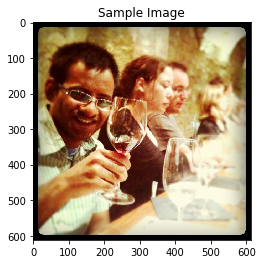

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Obtain sample image before and after pre-processing.
orig_image, image = next(iter(data_loader))

# Visualize sample image, before pre-processing.
plt.imshow(np.squeeze(orig_image))
plt.title('Sample Image')
plt.show()

<a id='step2'></a>
## Step 2: Load Trained Models

The next code cell contains a helper function that you will use move PyTorch tensors to GPU (if CUDA is available) and convert tensors to PyTorch variables.  Run this code cell before continuing.

In [3]:
%load_ext autoreload
%autoreload 2

import torch
from torch.autograd import Variable

def to_var(x, volatile=False):
    """ converts a Pytorch Tensor to a variable and moves to GPU if CUDA is available """
    if torch.cuda.is_available():
        x = x.cuda()
    return Variable(x, volatile=volatile)

Before running the code cell below, complete the following tasks.

### Task #1

In the next code cell, you will load the trained encoder and decoder from the previous notebook (**2_Training.ipynb**).  To accomplish this, you must specify the names of the saved encoder and decoder files in the `models/` folder (e.g., these names should be `encoder-5.pkl` and `decoder-5.pkl`, if you trained the model for 5 epochs and saved the weights after each epoch).  

### Task #2

Plug in both the embedding size and the size of the hidden layer of the decoder corresponding to the selected pickle file in `decoder_file`.

In [4]:
import os
import torch
from model import EncoderCNN, DecoderRNN

# TODO #1: Specify the saved models to load.
encoder_file = 'encoder-5.pkl' 
decoder_file = 'decoder-5.pkl' 

# TODO #2: Select appropriate values for the Python variables below.
embed_size = 256
hidden_size = 512

# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

# Initialize the encoder and decoder, and set each to inference mode.
encoder = EncoderCNN(embed_size)
encoder.eval()
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
decoder.eval()

# Load the trained weights.
encoder.load_state_dict(torch.load(os.path.join('./models', encoder_file)))
decoder.load_state_dict(torch.load(os.path.join('./models', decoder_file)))

# Move models to GPU if CUDA is available.
if torch.cuda.is_available():
    encoder.cuda()
    decoder.cuda()

<a id='step3'></a>
## Step 3: Finish the Sampler

Before executing the next code cell, you must write `sample` method in the `DecoderRNN` class in **model.py**.

- fine to do beam search or take the easy route
- note sentence should not be clean yet - will clean with file in the notebook.

In [5]:
# Convert image tensor to PyTorch variable.
image_var = to_var(image, volatile=True)

# Obtain the embedded image features.
features = encoder(image_var).unsqueeze(1)

# Pass the embedded image features through the model to get a predicted caption.
output = decoder.sample(features)
print(output)

assert (type(output)==list) & all([type(x)==int for x in output]) & all([x in data_loader.dataset.vocab.idx2word for x in output])

you may proceed


<a id='step4'></a>
## Step 4: Clean up the Captions

In [36]:
def clean_sentence(output):
    vocab = data_loader.dataset.vocab
    sentence = []
    for i in range(len(output)):
        vocab_id = output[i]
        word = vocab.idx2word[vocab_id]
        if word == vocab.end_word:
            break
        if word != vocab.start_word:
            sentence.append(word)
    sentence = ' '.join(sentence)
    return sentence

<a id='step5'></a>
## Step 5: Generate Predictions!

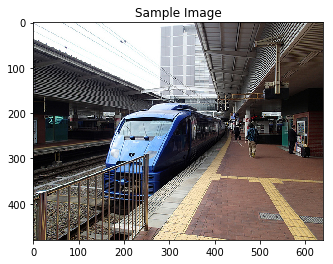

a train is traveling down the tracks near a platform .


In [41]:
orig_image, image = next(iter(data_loader))
plt.imshow(np.squeeze(orig_image))
plt.title('Sample Image')
plt.show()
image_var = to_var(image, volatile=True)
features = encoder(image_var).unsqueeze(1)
output = decoder.sample(features)
sentence = clean_sentence(output)
print(sentence)